In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [6]:
nltk.download('punkt')
nltk.download('punkt_tab',quiet=True)
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dyash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dyash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dyash\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dyash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dyash\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
df = pd.read_csv('../DATASET/cleaned_data.csv', encoding='latin-1')

In [8]:
# we will make 3 columns to count the numbers of characters , symbols and numbers

In [9]:
df['words']= df['message'].apply(lambda x :len(nltk.word_tokenize(x)))

In [10]:
df.head ()

,label,message,length,words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [11]:
df['sentences']= df['message'].apply(lambda x :len(nltk.sent_tokenize(x)))
df.head ()

,label,message,length,words,sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [12]:
## ENCODING THE LABEL VALUES

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label']) 

In [14]:
df[df['label']==0][['message','length','words','sentences']].describe()  # FOR HAM

,length,words,sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [15]:
df[df['label']==1][['message','length','words','sentences']].describe()  #FOR SPAM

,length,words,sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.902276,3.032129
std,29.183082,6.871851,1.546088
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [16]:
# DATA PREPROCESSING STEPS EXPLAINED
# 1. LOWER CASE
# What it does: Converts all text to lowercase (e.g., "Hello" → "hello")

# Why it's useful:

# Makes the model treat "Spam", "SPAM", and "spam" as the same word
# Reduces vocabulary size (fewer unique tokens to learn)
# Improves model generalization
# Example: Without lowercasing, the model might think "FREE" and "free" are different words
# 2. TOKENIZATION
# What it does: Splits text into individual words/tokens (e.g., "Hello world!" → ["Hello", "world", "!"])

# Why it's useful:

# Breaks down sentences into analyzable units
# Enables word-level analysis and feature extraction
# Required for most NLP models to process text
# Helps count word frequencies and patterns
# 3. REMOVING SPECIAL CHARACTERS
# What it does: Removes punctuation, symbols, numbers, etc. (e.g., "Call now!!!" → "Call now")

# Why it's useful:

# Reduces noise in the data
# Special characters often don't contribute to spam detection
# Reduces vocabulary size
# However, some symbols (like "$", "!", multiple "!!!") can be spam indicators, so be selective
# 4. REMOVING STOP WORDS AND PUNCTUATIONS
# What it does: Removes common words that don't carry much meaning (e.g., "the", "is", "and", "a")

# Why it's useful:

# Stop words appear frequently in both spam and ham messages
# They don't help distinguish between classes
# Reduces feature space and speeds up training
# Focuses model on meaningful content words
# Example: "Click the link now" → "Click link now" (removes "the")
# 5. STEMMING
# What it does: Reduces words to their root form (e.g., "running", "runs", "ran" → "run")

# Why it's useful:

# Groups related words together
# Reduces vocabulary size significantly
# Helps model recognize that "winning", "winner", "wins" are related concepts
# Common in spam: "FREE", "FREELY", "FREEDOM" all stem to similar roots
# Example spam words: "claim", "claiming", "claimed" → "claim"





In [17]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [18]:
def transform_text(text):
    ps=PorterStemmer()
    text = text.lower()   ## LOWERCASE CONVERSION
    text = nltk.word_tokenize(text)  ## TOKENIZATION

    ## REMOVING SPECIAL CHARACTERS

    arr = []

    for i in text:
        if i.isalnum():
            arr.append(i)
    text = arr[:]
    arr.clear()

    ## REMOVINF ENDING WORDS AND PUNCTUATIONS

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            arr.append(i)
    
    text = arr[:]
    arr.clear()

    

  ## SKEMMIZATION
    for i in text:
         arr.append(ps.stem(i))

    text = arr[:]

    return " ".join(text)






In [19]:
transform_text("IAM DANCING IN THE MOONLIGHT !!")

'iam danc moonlight'

In [20]:
df['transformed'] = df['message'].apply(lambda x : transform_text(x))

In [21]:
df.head()

,label,message,length,words,sentences,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#GENERATING A WORD CLOUD 

from wordcloud import WordCloud

In [28]:
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [29]:
spam_wc = wc.generate(df[df['label']==1]['transformed'].str.cat(sep=" "))

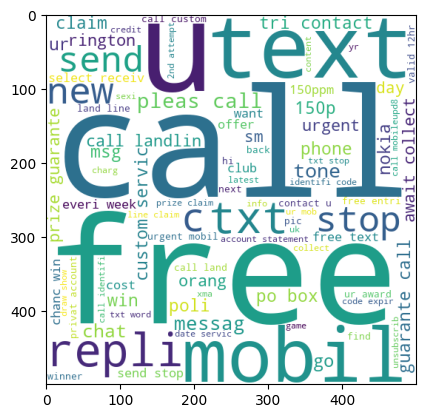

In [30]:
plt.imshow(spam_wc)

In [31]:
ham_wc = wc.generate(df[df['label']==0]['transformed'].str.cat(sep=" "))

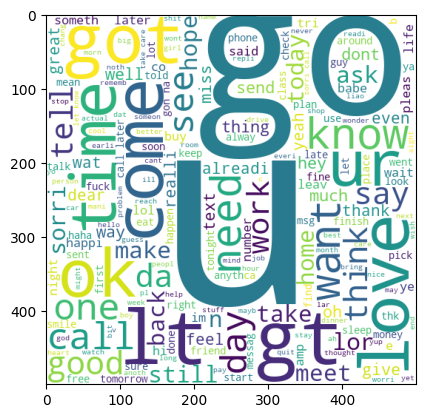

In [32]:
plt.imshow(ham_wc)

In [33]:
out_path = '../DATASET/final_data.csv'
df.to_csv(out_path, index=False, encoding='utf-8')
print(f"Saved cleaned dataset to {out_path} — {len(df)} rows.")

Saved cleaned dataset to ../DATASET/final_data.csv — 5572 rows.
